In [1]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import math
import datetime
import keras
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from datetime import datetime,timedelta
%matplotlib inline
from keras.models import Sequential
from sklearn.linear_model import LinearRegression


In [2]:
end_date = datetime.now()
stock_symbol = "GOOGL"
# Format the current date as "year-month-date"
# formatted_date = cend_date.strftime('%Y-%m-%d')
start_date = "2015-01-01"
end_date  = end_date.strftime('%Y-%m-%d')


In [3]:
df = yf.download(stock_symbol ,period='5y',interval='1d')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-24,57.970501,59.259499,57.575001,58.978001,58.978001,31150000
2018-09-25,59.212502,59.842999,58.704498,59.694500,59.694500,33152000
2018-09-26,59.684502,60.362000,59.270000,59.702999,59.702999,37650000
2018-09-27,60.000000,60.842999,59.902500,60.368000,60.368000,36274000
2018-09-28,60.204498,60.422501,59.891499,60.354000,60.354000,35612000
...,...,...,...,...,...,...
2023-09-18,136.610001,139.160004,136.610001,138.210007,138.210007,21861300
2023-09-19,137.419998,138.410004,136.619995,138.039993,138.039993,20353700
2023-09-20,138.080002,138.080002,133.619995,133.740005,133.740005,29927500


In [4]:
df["returns"] = np.log(df.Open.pct_change()+1)

In [5]:
# df["returns"][0] = 0

In [6]:
def lagit(df,lags):
    names = []
    for i in range(1,lags+1):
        df['Lag_'+str(i)] = df["returns"].shift(i)
        names.append("Lag_"+str(i))
    return names

In [7]:
lagnames = lagit(df,5)

In [8]:
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2018-09-24,57.970501,59.259499,57.575001,58.978001,58.978001,31150000,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,59.212502,59.842999,58.704498,59.694500,59.694500,33152000,0.021198,NaN,NaN,NaN,NaN,NaN
2018-09-26,59.684502,60.362000,59.270000,59.702999,59.702999,37650000,0.007940,0.021198,NaN,NaN,NaN,NaN
2018-09-27,60.000000,60.842999,59.902500,60.368000,60.368000,36274000,0.005272,0.007940,0.021198,NaN,NaN,NaN
2018-09-28,60.204498,60.422501,59.891499,60.354000,60.354000,35612000,0.003403,0.005272,0.007940,0.021198,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,136.610001,139.160004,136.610001,138.210007,138.210007,21861300,-0.009979,0.002758,0.018410,-0.008624,-0.002053,0.012010
2023-09-19,137.419998,138.410004,136.619995,138.039993,138.039993,20353700,0.005912,-0.009979,0.002758,0.018410,-0.008624,-0.002053
2023-09-20,138.080002,138.080002,133.619995,133.740005,133.740005,29927500,0.004791,0.005912,-0.009979,0.002758,0.018410,-0.008624


In [10]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2018-10-02,60.333500,61.226002,59.983002,60.382000,60.382000,40180000,-0.005232,0.007373,0.003403,0.005272,0.007940,0.021198
2018-10-03,60.599998,60.709000,60.107498,60.576500,60.576500,26246000,0.004407,-0.005232,0.007373,0.003403,0.005272,0.007940
2018-10-04,60.251499,60.294998,58.192501,58.853500,58.853500,46576000,-0.005767,0.004407,-0.005232,0.007373,0.003403,0.005272
2018-10-05,58.799999,59.099998,57.716000,58.391499,58.391499,31852000,-0.024386,-0.005767,0.004407,-0.005232,0.007373,0.003403
2018-10-08,58.000000,58.792999,56.770000,57.796001,57.796001,46190000,-0.013699,-0.024386,-0.005767,0.004407,-0.005232,0.007373
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,136.610001,139.160004,136.610001,138.210007,138.210007,21861300,-0.009979,0.002758,0.018410,-0.008624,-0.002053,0.012010
2023-09-19,137.419998,138.410004,136.619995,138.039993,138.039993,20353700,0.005912,-0.009979,0.002758,0.018410,-0.008624,-0.002053
2023-09-20,138.080002,138.080002,133.619995,133.740005,133.740005,29927500,0.004791,0.005912,-0.009979,0.002758,0.018410,-0.008624


In [11]:
train,test = train_test_split(df,shuffle=False,test_size=0.3,random_state=0)

In [12]:
model = LinearRegression()
model.fit(train[lagnames],train["returns"])


LinearRegression()

In [13]:
test["predictions_LR"] = model.predict(test[lagnames])
test["direction_LR"] = [1 if i>0 else -1 for i in test.predictions_LR]
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,predictions_LR,direction_LR
Date,,,,,,,,,,,,,,
2022-03-25,141.916000,142.035004,139.737503,141.673004,141.673004,24126000,0.019324,0.003580,0.018930,-0.000455,0.020321,0.002067,-0.000577,-1
2022-03-28,140.900497,142.002502,139.811493,141.455505,141.455505,35050000,-0.007181,0.019324,0.003580,0.018930,-0.000455,0.020321,-0.001786,-1
2022-03-29,142.647507,143.793503,142.038498,142.505493,142.505493,34318000,0.012323,-0.007181,0.019324,0.003580,0.018930,-0.000455,0.000602,1
2022-03-30,142.460007,142.720505,141.600006,141.938507,141.938507,19884000,-0.001315,0.012323,-0.007181,0.019324,0.003580,0.018930,-0.001149,-1
2022-03-31,142.052994,142.108002,139.024506,139.067505,139.067505,37524000,-0.002861,-0.001315,0.012323,-0.007181,0.019324,0.003580,0.000485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,136.610001,139.160004,136.610001,138.210007,138.210007,21861300,-0.009979,0.002758,0.018410,-0.008624,-0.002053,0.012010,0.001483,1
2023-09-19,137.419998,138.410004,136.619995,138.039993,138.039993,20353700,0.005912,-0.009979,0.002758,0.018410,-0.008624,-0.002053,0.001978,1
2023-09-20,138.080002,138.080002,133.619995,133.740005,133.740005,29927500,0.004791,0.005912,-0.009979,0.002758,0.018410,-0.008624,-0.000948,-1


In [14]:
test["Strategy_LR"] = test["direction_LR"]*test["returns"]
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,predictions_LR,direction_LR,Strategy_LR
Date,,,,,,,,,,,,,,,
2022-03-25,141.916000,142.035004,139.737503,141.673004,141.673004,24126000,0.019324,0.003580,0.018930,-0.000455,0.020321,0.002067,-0.000577,-1,-0.019324
2022-03-28,140.900497,142.002502,139.811493,141.455505,141.455505,35050000,-0.007181,0.019324,0.003580,0.018930,-0.000455,0.020321,-0.001786,-1,0.007181
2022-03-29,142.647507,143.793503,142.038498,142.505493,142.505493,34318000,0.012323,-0.007181,0.019324,0.003580,0.018930,-0.000455,0.000602,1,0.012323
2022-03-30,142.460007,142.720505,141.600006,141.938507,141.938507,19884000,-0.001315,0.012323,-0.007181,0.019324,0.003580,0.018930,-0.001149,-1,0.001315
2022-03-31,142.052994,142.108002,139.024506,139.067505,139.067505,37524000,-0.002861,-0.001315,0.012323,-0.007181,0.019324,0.003580,0.000485,1,-0.002861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,136.610001,139.160004,136.610001,138.210007,138.210007,21861300,-0.009979,0.002758,0.018410,-0.008624,-0.002053,0.012010,0.001483,1,-0.009979
2023-09-19,137.419998,138.410004,136.619995,138.039993,138.039993,20353700,0.005912,-0.009979,0.002758,0.018410,-0.008624,-0.002053,0.001978,1,0.005912
2023-09-20,138.080002,138.080002,133.619995,133.740005,133.740005,29927500,0.004791,0.005912,-0.009979,0.002758,0.018410,-0.008624,-0.000948,-1,-0.004791


In [15]:
np.exp(test[["returns","Strategy_LR"]].sum())

returns        0.939368
Strategy_LR    1.090250
dtype: float64

<Axes: xlabel='Date'>

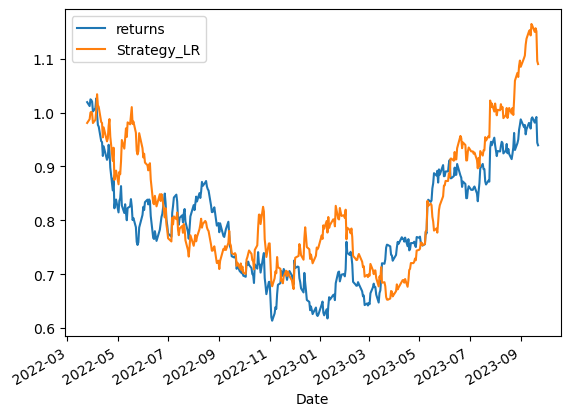

In [16]:
np.exp(test[["returns","Strategy_LR"]].cumsum()).plot()

## Number of Trades needed to achieve this performance

In [21]:
(test["direction_LR"].diff() != 0).sum()

154